In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Using lemonade.csv dataset and focusing on continuous variables:

In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [4]:
df = pd.read_csv(url)

In [7]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [20]:
def iqr_lower_outliers(df, col, multiplier=1.5):
			multiplier = multiplier
			q1 = df[col].quantile(.25)
			q3 = df[col].quantile(.75)
			iqr = q3 - q1
			lower_fence = q1 - (multiplier*iqr)
			return df[(df[col] < lower_fence)]

for col in ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']:
    print(iqr_lower_outliers(df, col).to_markdown())
    print(col)
    print()
    print()

|     | Date     | Day    |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|----:|:---------|:-------|--------------:|-----------:|---------:|--------:|--------:|
| 364 | 12/31/17 | Sunday |          15.1 |        2.5 |        9 |     0.5 |       7 |
Temperature


| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   |
|--------|-------|---------------|------------|----------|---------|---------|
Rainfall


|     | Date     | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|----:|:---------|:--------|--------------:|-----------:|---------:|--------:|--------:|
| 324 | 11/21/17 | Tuesday |            47 |       0.95 |      -38 |     0.5 |      20 |
Flyers


| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   |
|--------|-------|---------------|------------|----------|---------|---------|
Price


| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   |
|--------|-------|--------------

In [19]:
# Temperature should be kept. Abnormally low temperatures make sense in december
# Flyers should be dropped. Cannot hand out negative number of flyers

Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [21]:
def iqr_upper_outliers(df, col, multiplier=1.5):
			multiplier = multiplier
			q1 = df[col].quantile(.25)
			q3 = df[col].quantile(.75)
			iqr = q3 - q1
			upper_fence = q3 + (multiplier*iqr)
			return df[(df[col] > upper_fence)]

for col in ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']:
    print(iqr_upper_outliers(df, col).to_markdown())
    print(col)
    print()
    print()

|    | Date    | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|---:|:--------|:---------|--------------:|-----------:|---------:|--------:|--------:|
| 41 | 2/11/17 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 |
Temperature


|     | Date     | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|----:|:---------|:----------|--------------:|-----------:|---------:|--------:|--------:|
|   0 | 1/1/17   | Sunday    |          27   |       2    |       15 |     0.5 |      10 |
|   1 | 1/2/17   | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 |
|   2 | 1/3/17   | Tuesday   |          34.5 |       1.33 |       27 |     0.5 |      15 |
|   5 | 1/6/17   | Friday    |          25.3 |       1.54 |       23 |     0.5 |      11 |
|   6 | 1/7/17   | Saturday  |          32.9 |       1.54 |       19 |     0.5 |      13 |
|  10 | 1/11/17  | Wednesday |          32.6 |       1.54 |       23 |     0.5 |     

In [22]:
# temperature should be dropped 212 is not realistic
# rainfall should be kept, seems to be rainy season
# flyers should be kept, seemed to be nice weather and productive days
# sales should be kept, crazy good days for sales, 4th of july weekend

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [23]:
for col in ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']:
    print(iqr_lower_outliers(df, col, 3).to_markdown())
    print(col)
    print()
    print()

| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   |
|--------|-------|---------------|------------|----------|---------|---------|
Temperature


| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   |
|--------|-------|---------------|------------|----------|---------|---------|
Rainfall


|     | Date     | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|----:|:---------|:--------|--------------:|-----------:|---------:|--------:|--------:|
| 324 | 11/21/17 | Tuesday |            47 |       0.95 |      -38 |     0.5 |      20 |
Flyers


| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   |
|--------|-------|---------------|------------|----------|---------|---------|
Price


| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   |
|--------|-------|---------------|------------|----------|---------|---------|
Sales




In [24]:
# flyers should be dropped

Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [25]:
for col in ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']:
    print(iqr_upper_outliers(df, col, 3).to_markdown())
    print(col)
    print()
    print()

|    | Date    | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|---:|:--------|:---------|--------------:|-----------:|---------:|--------:|--------:|
| 41 | 2/11/17 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 |
Temperature


|     | Date     | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|----:|:---------|:--------|--------------:|-----------:|---------:|--------:|--------:|
|   0 | 1/1/17   | Sunday  |          27   |       2    |       15 |     0.5 |      10 |
| 338 | 12/5/17  | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 |
| 343 | 12/10/17 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 |
| 364 | 12/31/17 | Sunday  |          15.1 |       2.5  |        9 |     0.5 |       7 |
Rainfall


| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   |
|--------|-------|---------------|------------|----------|---------|---------|
Flyers


| Date   |

In [26]:
# same comments as before

### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

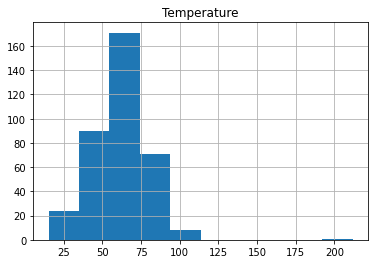

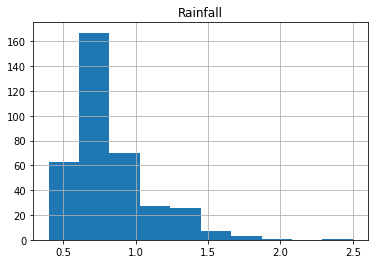

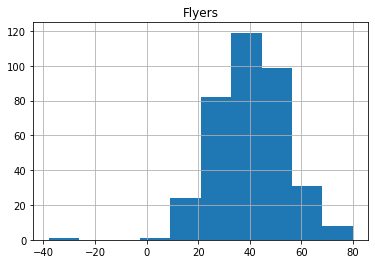

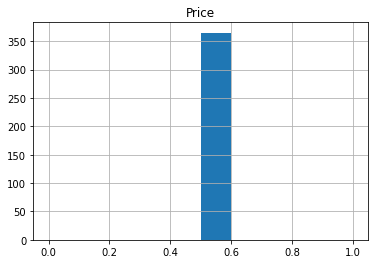

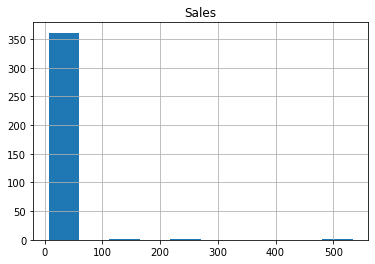

In [28]:
for col in ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']:
    df[col].hist()
    plt.title(col)
    plt.show()
    print()
    print()

In [29]:
# temp, rainfall, and flyers are normal-ish
# price and sales are not

Use a 2 sigma decision rule to isolate the outliers.
Do these make sense?
Should certain outliers be kept or removed?

In [33]:
def zscores(df, col, threshold=3):
    df[f'{col}_zscores'] = (df[col] - df[col].mean()) / df[col].std()
    return df[df[f'{col}_zscores'].abs() >= threshold]

In [34]:
for col in ['Temperature', 'Rainfall', 'Flyers']:
    print(zscores(df, col, 2))
    print(col)
    print()
    print()

         Date       Day  Temperature  Rainfall  Flyers  Price  Sales  \
41    2/11/17  Saturday        212.0      0.91      35    0.5     21   
166   6/16/17    Friday         99.3      0.47      77    0.5     41   
176   6/26/17    Monday        102.6      0.47      60    0.5     42   
181    7/1/17  Saturday        102.9      0.47      59    0.5    143   
190   7/10/17    Monday         98.0      0.49      66    0.5     40   
198   7/18/17   Tuesday         99.3      0.47      76    0.5     41   
202   7/22/17  Saturday         99.6      0.47      49    0.5     42   
207   7/27/17  Thursday         97.9      0.47      74    0.5     43   
338   12/5/17   Tuesday         22.0      1.82      11    0.5     10   
364  12/31/17    Sunday         15.1      2.50       9    0.5      7   

     Temperature_zscores  
41              8.336627  
166             2.105251  
176             2.287714  
181             2.304301  
190             2.033372  
198             2.105251  
202             2.

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [35]:
for col in ['Temperature', 'Rainfall', 'Flyers']:
    print(zscores(df, col, 3))
    print(col)
    print()
    print()

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales  \
41  2/11/17  Saturday        212.0      0.91      35    0.5     21   

    Temperature_zscores  Rainfall_zscores  Flyers_zscores  
41             8.336627          0.306792       -0.370227  
Temperature


         Date      Day  Temperature  Rainfall  Flyers  Price  Sales  \
0      1/1/17   Sunday         27.0      2.00      15    0.5     10   
15    1/16/17   Monday         30.6      1.67      24    0.5     12   
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10   
343  12/10/17   Sunday         31.3      1.82      15    0.5     11   
364  12/31/17   Sunday         15.1      2.50       9    0.5      7   

     Temperature_zscores  Rainfall_zscores  Flyers_zscores  
0              -1.892340          4.286488       -1.820927  
15             -1.693290          3.081626       -1.168112  
338            -2.168799          3.629291       -2.111067  
343            -1.654586          3.629291       -1.82